# Introduction to Regression with Nueral Networks in TensorFlow 

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variable, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
%tensorflow_version 2.x
import tensorflow as tf

## Creating data to view and fit 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0, -1.0, 2., 5., 8.,11.,14.])

# Create features
Y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

plt.scatter(X, Y)

Input and output shapes

In [ ]:
#  Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

In [ ]:
# Turn our Numpy into tensors

x = tf.constant(X, dtype=tf.float32)
y = tf.constant(Y, dtype=tf.float32)
x,y

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

In [ ]:
plt.scatter(x,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. C**ompiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns it's learning) and evaluation metrics(what can we use to interpret the performance of our model).
3. **Fitting a model **- letting the model try to find patterns between X & Y(features and labels).

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, #mean absolute error
    optimizer=tf.keras.optimizers.SGD(), #short for stochastic gradient descent
    metrics=["mae"])

# 3.Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

In [ ]:
# Check out X and y
x,y

In [ ]:
# Try and make a prediction using our model
pred = model.predict([17.0])
pred #WRONG!!!!!!!!!

In [ ]:
pred + 10.9748 #still wrong

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. ** Creating a model ** - here we might add more layers, increase the number of hidden units(neurons) whithin each of the hidden layers, change the activation function of each layer.
2. ** Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a  model** - here we might fit the model for more **epochs** (leave it to train longer) or on more data(give the model more learning examples)

In [ ]:
#let's rebuild our model

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, #mean absolute error
    optimizer=tf.keras.optimizers.Adam(lr=0.01), #short for stochastic gradient descent
    metrics=["mae"])

# 3.this time we'll train for longer
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

In [ ]:
model.predict([17.0]) #i think i overfit it,

#output:
#array([[28.696487]], dtype=float32)

## Evaluating a model

in practice, a typical workflow you'll go through when building neural networks iL

```
Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it...
```


When it comes to evaluation:
"Visualize, Visualize, "

It's good idea to visualize:
 * The data
 * the model itself
 * the training of a model
 * The predictions of a model

In [ ]:
# Make a bigger dataset
X = tf.range(-100,104, 4)
X

In [ ]:
# Make labels for the dataset
y = X + 10
y

In [ ]:
# Visualize the data

plt.scatter(X,y)

### The 3 sets...
# New Section
* **Training set** - the model learns from this data, which i typically 70-80% of the total data you have.
* **Validation set** - the model get tuned on this data, typically 10-15% of total data
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of total data *italicized text*

In [ ]:
# Check the length of how many sampels we have
len(X)

In [ ]:
#Split the data into training and test sets

X_train = X [:40] #first 40, 80% of the data
y_train = y[:40]

X_test =X[40:] #last 11, 20%
y_test =y[40:] 

len(X_train), len(X_test)

### Visualizinbg data

Now we've got our data in training and test sets, lets visualize it!

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label = "Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1.Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3.Fit Model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)

In [ ]:
model.summary()

In [ ]:
X[0], y[0]

In [ ]:
#Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

#Create a model(same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

#2. Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

In [ ]:
model.summary()

* Total params = total number of parameters in the model
* traininable params - these are the parameters(patterns) the model can update a it trains
* non trainable params- these arent updated during training

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.


In [ ]:
y_preds = model.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
#Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels = y_train, test_data=X_test, test_labels=y_test, predictions=y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  #plot the model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend();

In [ ]:
predictions = plot_predictions()
predictions

### Evaluating out model' predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrtics to evaluate your model's performance

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "Square the average error"

In [ ]:
# Evaluate the model on the test 
model.evaluate(X_test, y_test)

In [ ]:
#clacl mean absolute error
tf.keras.losses.mae(y_test, tf.constant(y_preds))

In [ ]:
tf.squeeze(tf.constant(y_preds))

In [ ]:
y_test

In [ ]:
tf.keras.losses.mae(y_test, tf.squeeze(y_preds))

In [ ]:
tf.keras.losses.MSE(y_test, tf.squeeze(y_preds))

In [ ]:
#Make some function to resue MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true, y_pred=tf.squeeze(y_pred)) 

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))  

In [ ]:
# lets build model 1

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mse_1,mae_1

In [ ]:
# lets build model 2

#2 dense layers, 100 epochs

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mse_2,mae_2

In [ ]:
# lets build model 2

#2 dense layers, 500 epochs

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)


In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3, mse_3

### Running experiment to improve our models

```
Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it...
```

1. Get more data - get more examples for ur model to train, to learn more patterns between features and labels

2. Make your Model larget - this might be in the form of more layers of neurons in each layer

3. train for longer - give ur model more chance to find patterns

Let's do 3 modelling experiments:

1. `model` - same as the original model, 1 layer, trained 100 epoches
2. `model2` - 2 layers,  100 epoches
3. `model3` - 2 layers, 500 epoches

### **Comparing the results of our expirements**

We've run a few experiments, let's compare the results


In [ ]:

# Let's compare our model's results using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(),mae_1.numpy()],
                 ["model_2", mae_2.numpy(),mae_2.numpy()],
                 ["model_3", mae_3.numpy(),mae_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

```Model_2 > model_1 > model_3```

In [ ]:
model_2.summary()

### Tracking your experiments

a good habit is to track your results, doing so might be tedious, luckly, there are tools to help us...



### **SAVING OUR MODELS**

> Indented block
this lets us use the model outside good colab

There are to main format we can save our model's to:
1. The SaveModel format
2. The HDF5 format

In [ ]:
# Save model in SaveModel
model_2.save("FIRST_SAVED_MODEL_EZZZZ")

In [ ]:
# Save model in HDF5
model_2.save("SECOND_SAVED_MODEL_OMG.h5")

LOAD SAVED MODEL!!!

In [ ]:
# Load saved saveModel model
loaded_SavedModel_format = tf.keras.models.load_model("/content/FIRST_SAVED_MODEL_EZZZZ")
loaded_SavedModel_format.summary()

In [ ]:
# Compare model_2 and loaded_SavedModel_format predictions

loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds = model_2.predict(X_test)

loaded_SavedModel_format_preds == model_2_preds

### Download a model from Google Colab

1. Go to the files tab, and right click on the file u want, the click "download".
2. Using code(see the cell below)
3. Save it to Google drive, by connecting to Google drive and copying it there(see 2nd code cell)

In [ ]:
# Download a file from Google Colab
from google.colab import files

files.download("/content/FIRST_SAVED_MODEL_EZZZZ")

In [ ]:
# Save a file from Google Colab to Google Drive(requires mounting Google Drive)
!cp /content/SECOND_SAVED_MODEL_OMG.h5 /content/drive/MyDrive/model_2

In [ ]:
!ls /content/drive/MyDrive/model_2

## **A larger Example**

In [ ]:
# import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#First preprocess the data

#ENCODE THE NON NUMERICAL VARIABLES


data_encoded = pd.get_dummies(insurance)
data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
#seperate the data into features and labels

features = data_encoded.drop(labels="charges", axis=1)


labels = insurance.drop(["age", "sex", "bmi", "children", "smoker", "region"], axis=1)


In [ ]:
# split the data 80% training, 20% testing
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, lables_test = train_test_split(features, labels, test_size=0.2, random_state=42)

len(features), len(features_train), len(features_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

#build the model
#I CHANGED TO ADAM OPTIMIZER AND DOUBLED THE EPOCHS AND ADDED 1 MORE LAYER
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

history = model.fit(features_train, labels_train, epochs=200, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
34/34 [==============================] - 5s 3ms/step - loss: 11434.4629 - mae: 11434.4629
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7504.8208 - mae: 7504.8208
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7289.5034 - mae: 7289.5034
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7064.4629 - mae: 7064.4629
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6825.5923 - mae: 6825.5923
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6569.6016 - mae: 6569.6016
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 6254.7827 - mae: 6254.7827
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6121.6006 - mae: 6121.6006
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5940.2461 - mae: 5940.24

In [ ]:
#check results on the test set

model.evaluate(features_test, lables_test)

9/9 [==============================] - 0s 2ms/step - loss: 3204.1846 - mae: 3204.1846


[3204.1845703125, 3204.1845703125]

Text(0.5, 0, 'epochs')

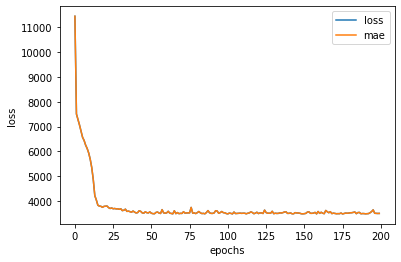

In [ ]:
#plot history (aka a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long Should you train for?

It depends. Really, it depends on the problem you're working on, fortunately, tensorflow has a solution, It's called the EarlyStopping Callback, which is a tensorflow component you add to your model to stop training once it stops improving a certain metric

In [ ]:
#implementing early stopping



##PreProcessing data(normalization and standardization)

1. turn all data to numbers
2. make all the tensors the right shape
3. joe

In terms of scaling values, nn tend to prefer normalization

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Read in the insurance df
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we will use classes from scikit-learn


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer(transforms the columns)
mct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all the values in thses columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

#Create x and y  x=features y=labels

x = insurance.drop("charges",axis=1)
y = insurance["charges"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#Fit the column transformer to our training data

mct.fit(x_train)

#transorm training and test test data with normalization and onehotencdor
x_train_normal = mct.transform(x_train)
x_test_normal = mct.transform(x_test)

In [ ]:
x_train.loc[0]

In [ ]:
x_train_normal[0]

In [ ]:
x_train.shape

In [ ]:
x_train_normal.shape #MORE COLUMNS!!!

NICE! Our data has been normalized and one hjot encoded, now lets build a nueral network model around it

In [ ]:
x_train_normal

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [ ]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,mode="min")

insurance_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100),                                              
  tf.keras.layers.Dense(10),                                             
  tf.keras.layers.Dense(1)                                                
])

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

history = insurance_model.fit(x_train_normal, y_train, epochs=100,  callbacks=[callback])


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 4ms/step - loss: 13217.9922 - mae: 13217.9922
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 11378.7979 - mae: 11378.7979
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8112.9438 - mae: 8112.9438
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7588.9111 - mae: 7588.9111
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7103.4795 - mae: 7103.4795
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6513.8721 - mae: 6513.8721
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 5594.0000 - mae: 5594.0000
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 4434.3428 - mae: 4434.3428
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 3745.8264 - mae: 3745.8264
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3679.4285 - mae: 3679.4285
Epoch 1

In [ ]:
insurance_model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3151.9294 - mae: 3151.9294


[3151.929443359375, 3151.929443359375]

Text(0.5, 0, 'epochs')

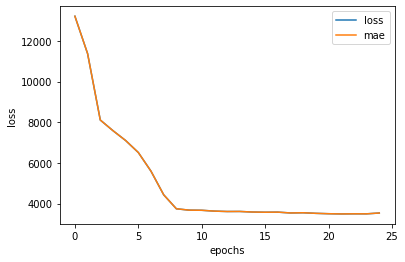

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")